<a href="https://colab.research.google.com/github/PavaniMuppalla29/Menstrual_Pain_Prediction/blob/main/ML_CBP(updated).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Menstrual Pain Prediction**

In [ ]:
from google.colab import files
files.upload()

Saving period - Copy.csv to period - Copy.csv


{'period - Copy.csv': b'number_of_peak,Age,Length_of_cycle,Estimated_day_of_ovulution,Length_of_Leutal_Phase,Length_of_menses,Unusual_Bleeding,Height,Weight,Income,BMI,Mean_of_length_of_cycle,Menses_score\r\n3,18,27,14,9,5,no,5 6,76,0,26.3,30,4\r\n4,18,25,17,10,6,yes,5 6,76,0,26.3,30,5\r\n2,19,30,17,13,4,no,5 3,56,0,21.9,30,2\r\n3,19,28,16,14,6,no,5 1,61,0,25.4,30,3\r\n2,19,35,18,15,5,no,5\'3,55,0,21.5,35,5\r\n5,19,30,15,10,6,yes,5\'3,50,0,19,30,2\r\n3,19,40,10,12,5,yes,5\'4,60,0,22.3,40,3\r\n2,20,30,14,10,5,no,5\'1,58,0,24.5,30,5\r\n3,18,30,16,14,5,no,5\'3,60,0,22.2,30,5\r\n3,19,27,15,16,6,yes,5\'4,51,0,19.2,30,3\r\n3,18,30,15,13,6,no,5\'0,55,0,21.9,30,3\r\n1,19,28,18,14,6,no,5\'4,54,0,20.4,28,2\r\n3,20,37,17,16,4,no,"5\'4""",43,0,16.6,30,4\r\n2,22,25,14,9,5,no,5\'9,72,0,23.5,28,2\r\n3,23,28,15,9,6,no,5\'5\'\',60,0,22,28,3\r\n2,19,34,15,10,4,no,5\'5\'\',75,0,27.5,30,2\r\n2,18,26,11,10,6,no,5\'0,55,0,21.9,26,3\r\n2,19,30,14,11,6,no,5\'1,48,0,20,30,4\r\n2,18,28,15,14,4,no,5\'6,45.5,0,16

In [ ]:
import pandas as pd

df = pd.read_csv("period - Copy.csv")
df.head()

,number_of_peak,Age,Length_of_cycle,Estimated_day_of_ovulution,Length_of_Leutal_Phase,Length_of_menses,Unusual_Bleeding,Height,Weight,Income,BMI,Mean_of_length_of_cycle,Menses_score
0,3,18,27,14,9,5,no,5 6,76.0,0,26.3,30,4.0
1,4,18,25,17,10,6,yes,5 6,76.0,0,26.3,30,5.0
2,2,19,30,17,13,4,no,5 3,56.0,0,21.9,30,2.0
3,3,19,28,16,14,6,no,5 1,61.0,0,25.4,30,3.0
4,2,19,35,18,15,5,no,5'3,55.0,0,21.5,35,5.0


In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
null_counts = df.isnull().sum()
print("Null counts in each column:")
print(null_counts)

Null counts in each column:
number_of_peak                0
Age                           0
Length_of_cycle               0
Estimated_day_of_ovulution    0
Length_of_Leutal_Phase        0
Length_of_menses              0
Unusual_Bleeding              0
Height                        0
Weight                        0
Income                        0
BMI                           0
Mean_of_length_of_cycle       0
Menses_score                  0
dtype: int64


In [ ]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in column '{column}':")
    print(unique_values)

Unique values in column 'number_of_peak':
[3 4 2 5 1]
Unique values in column 'Age':
[18 19 20 22 23 14 17 25]
Unique values in column 'Length_of_cycle':
[27 25 30 28 35 40 37 34 26 23 29 24 22 36 38 32]
Unique values in column 'Estimated_day_of_ovulution':
[14 17 16 18 15 10 11 13  7 20 12 22]
Unique values in column 'Length_of_Leutal_Phase':
[ 9 10 13 14 15 12 16 11  7  8 19 30]
Unique values in column 'Length_of_menses':
[5 6 4 3 1 7 8]
Unique values in column 'Unusual_Bleeding':
['no' 'yes' 'No' 'NO']
Unique values in column 'Height':
['5 6' '5 3' '5 1' "5'3" "5'4" "5'1" "5'0" '5\'4"' "5'9" "5'5''" "5'6"
 "5'" "5'2.5" "5'2" "4'8" "4' 11" "5'7" '5 4' "5' 4" "5'5" '56' "5'8"
 '5\'2"' '5.3"' '5\'5"' '5\'1"' '5\'3"']
Unique values in column 'Weight':
[76.  56.  61.  55.  50.  60.  58.  51.  54.  43.  72.  75.  48.  45.5
 53.  47.  82.  57.  40.  64.  55.2 65.  62.  85.  84.  52.  70. ]
Unique values in column 'Income':
[0]
Unique values in column 'BMI':
[26.3  21.9  25.4  21.5  19.   2

In [ ]:
df["Unusual_Bleeding"]=df["Unusual_Bleeding"].map({"NO":0,"No":0,"no":0,"yes":1})
df["Menses_score"]=df["Menses_score"].astype(str).map({"1.0":0, "2.0":1, "3.0":2, "4.0":3, "4.2":4, "4.5":5, "5.0":6})

In [ ]:
df.drop("Income", axis=1, inplace=True)
df.drop("Height", axis=1, inplace=True)

In [ ]:
x=df.drop("Menses_score", axis=1)
y=df["Menses_score"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
model = xgb.XGBClassifier(
    objective='multi:softmax',
    eval_metric='mlogloss'
)
model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softmax', ...)

In [ ]:
y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print(classification_report(y_test, y_pred))

Accuracy: 0.8787878787878788
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       0.75      1.00      0.86         6
           2       1.00      0.85      0.92        13
           3       0.75      0.75      0.75         8
           6       1.00      1.00      1.00         4

    accuracy                           0.88        33
   macro avg       0.90      0.92      0.90        33
weighted avg       0.89      0.88      0.88        33



<ipython-input-20-c6b643a1d6b6>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Weight'].fillna(df['Weight'].mean(), inplace=True)
<ipython-input-20-c6b643a1d6b6>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Menses_score', data=df, palette='Set2')


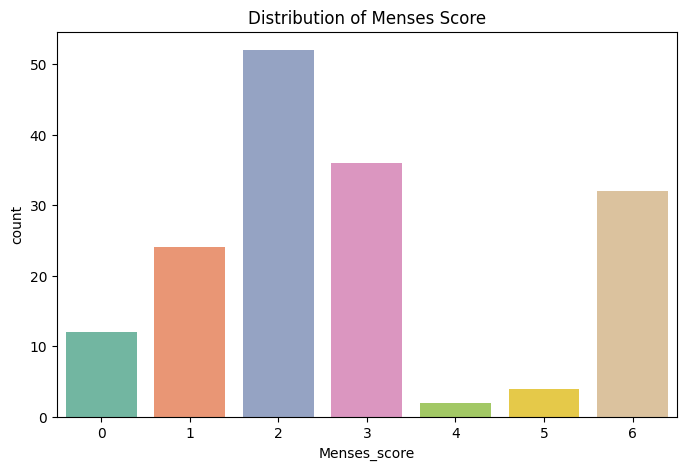

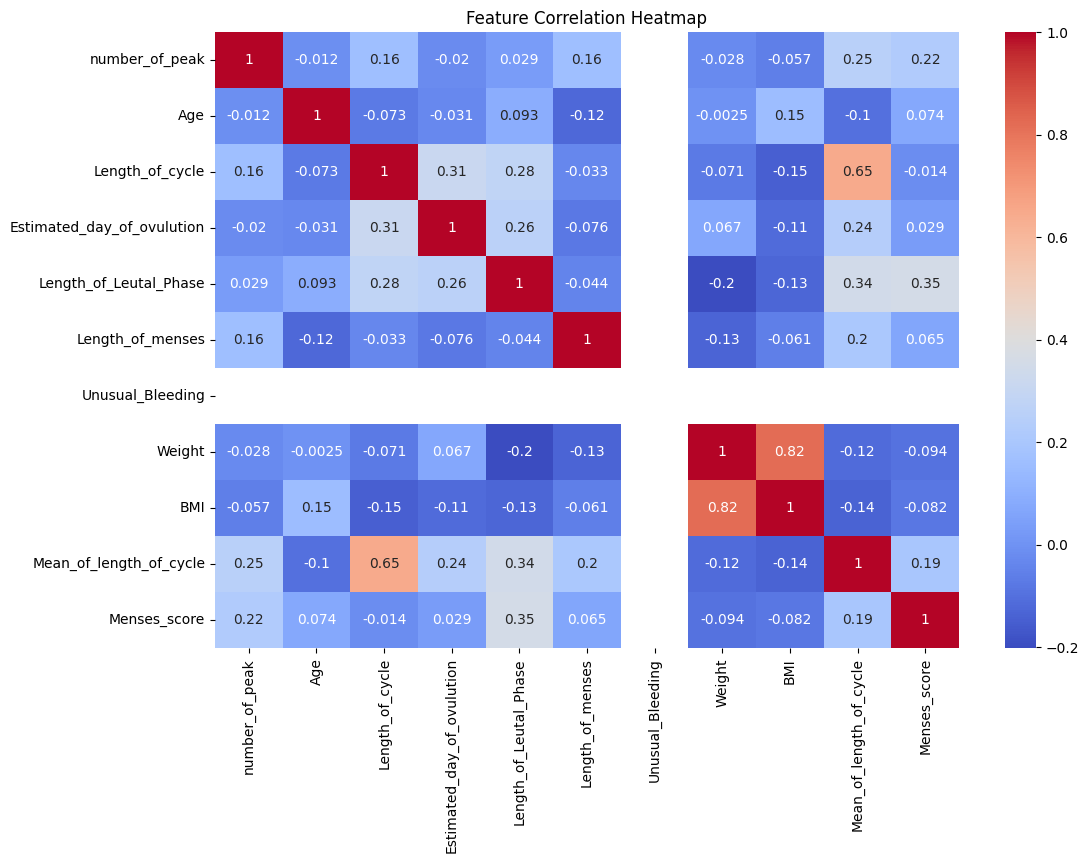

<ipython-input-20-c6b643a1d6b6>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Menses_score', y=feature, data=df, palette='cool')


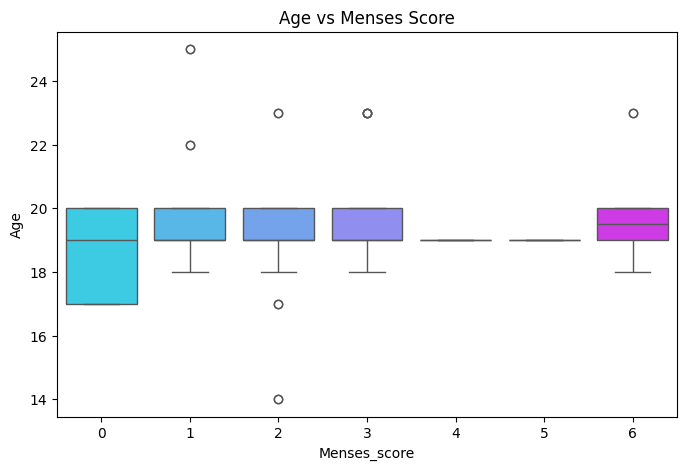

<ipython-input-20-c6b643a1d6b6>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Menses_score', y=feature, data=df, palette='cool')


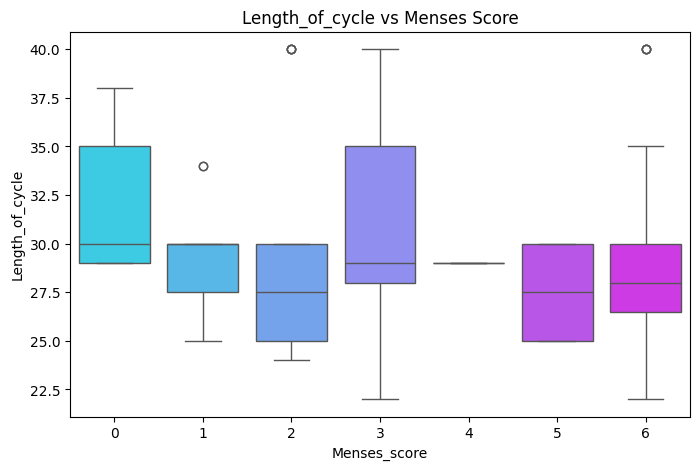

<ipython-input-20-c6b643a1d6b6>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Menses_score', y=feature, data=df, palette='cool')


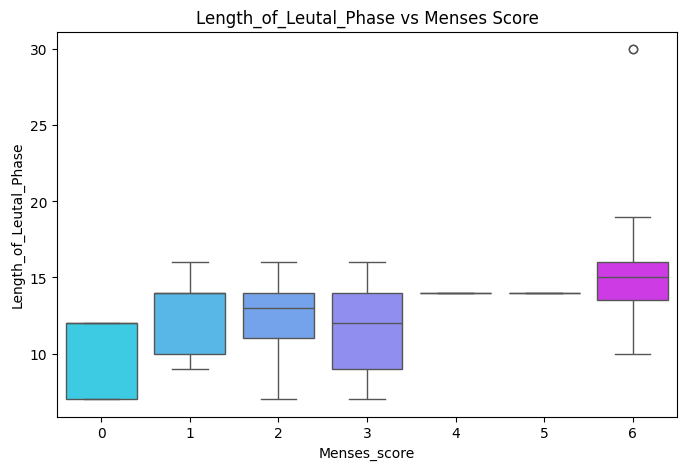

<ipython-input-20-c6b643a1d6b6>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Menses_score', y=feature, data=df, palette='cool')


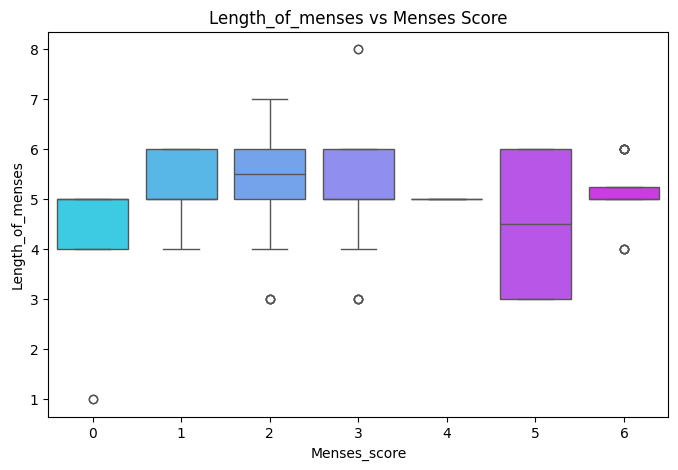

<ipython-input-20-c6b643a1d6b6>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Menses_score', y=feature, data=df, palette='cool')


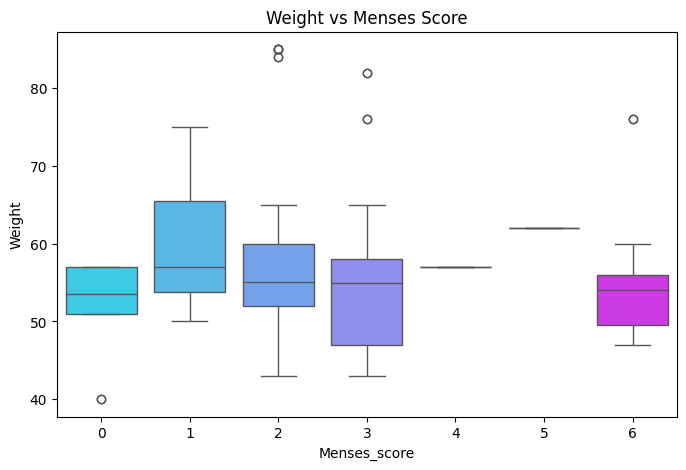

<ipython-input-20-c6b643a1d6b6>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Menses_score', y=feature, data=df, palette='cool')


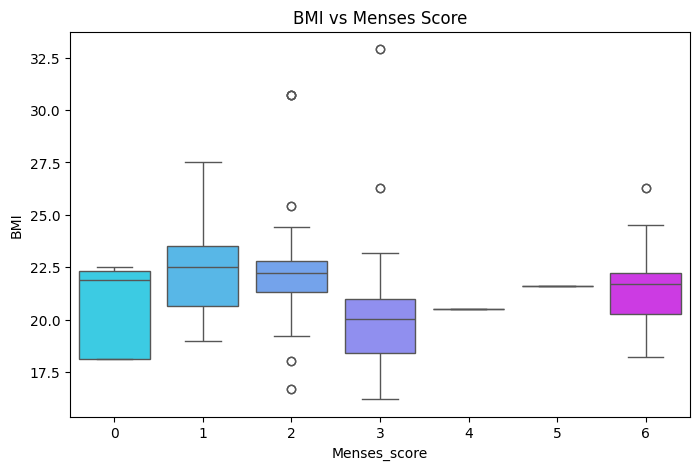

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



df['Weight'].fillna(df['Weight'].mean(), inplace=True)




plt.figure(figsize=(8,5))
sns.countplot(x='Menses_score', data=df, palette='Set2')
plt.title('Distribution of Menses Score')
plt.show()

plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()


features = ['Age', 'Length_of_cycle', 'Length_of_Leutal_Phase', 'Length_of_menses', 'Weight', 'BMI']

for feature in features:
    plt.figure(figsize=(8,5))
    sns.boxplot(x='Menses_score', y=feature, data=df, palette='cool')
    plt.title(f'{feature} vs Menses Score')
    plt.show()




**Testing of ML Model**

In [ ]:
score_mapping = {
    1: 'Very Mild Pain',
    2: 'Mild Pain',
    3: 'Moderate Pain',
    4: 'Severe Pain',
    5: 'Very Severe Pain'
}


In [ ]:
import pandas as pd

sample = pd.DataFrame([{
    'number_of_peak': 3,
    'Age': 21,
    'Length_of_cycle': 28,
    'Estimated_day_of_ovulution': 14,
    'Length_of_Leutal_Phase': 12,
    'Length_of_menses': 6,
    'Unusual_Bleeding': 0,
    'Weight': 60.0,
    'BMI': 22.5,
    'Mean_of_length_of_cycle': 30
}])
predicted_class = model.predict(sample)[0]


predicted_label = score_mapping.get(predicted_class, "Unknown")

print("Predicted Menses Score Class:", predicted_class)
print("Meaning:", predicted_label)

Predicted Menses Score Class: 2
Meaning: Mild Pain


In [ ]:

sample = df[['number_of_peak', 'Age', 'Length_of_cycle', 'Estimated_day_of_ovulution',
             'Length_of_Leutal_Phase', 'Length_of_menses', 'Unusual_Bleeding',
             'Weight', 'BMI', 'Mean_of_length_of_cycle']].iloc[[0]]


sample['Unusual_Bleeding'] = sample['Unusual_Bleeding'].map({'yes': 1, 'no': 0})
predicted_class = model.predict(sample)[0]
predicted_label = score_mapping.get(predicted_class, "Unknown")

print("Predicted Menses Score Class:", predicted_class)
print("Meaning:", predicted_label)


Predicted Menses Score Class: 3
Meaning: Moderate Pain
